<bound method NDFrame.head of        show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2  

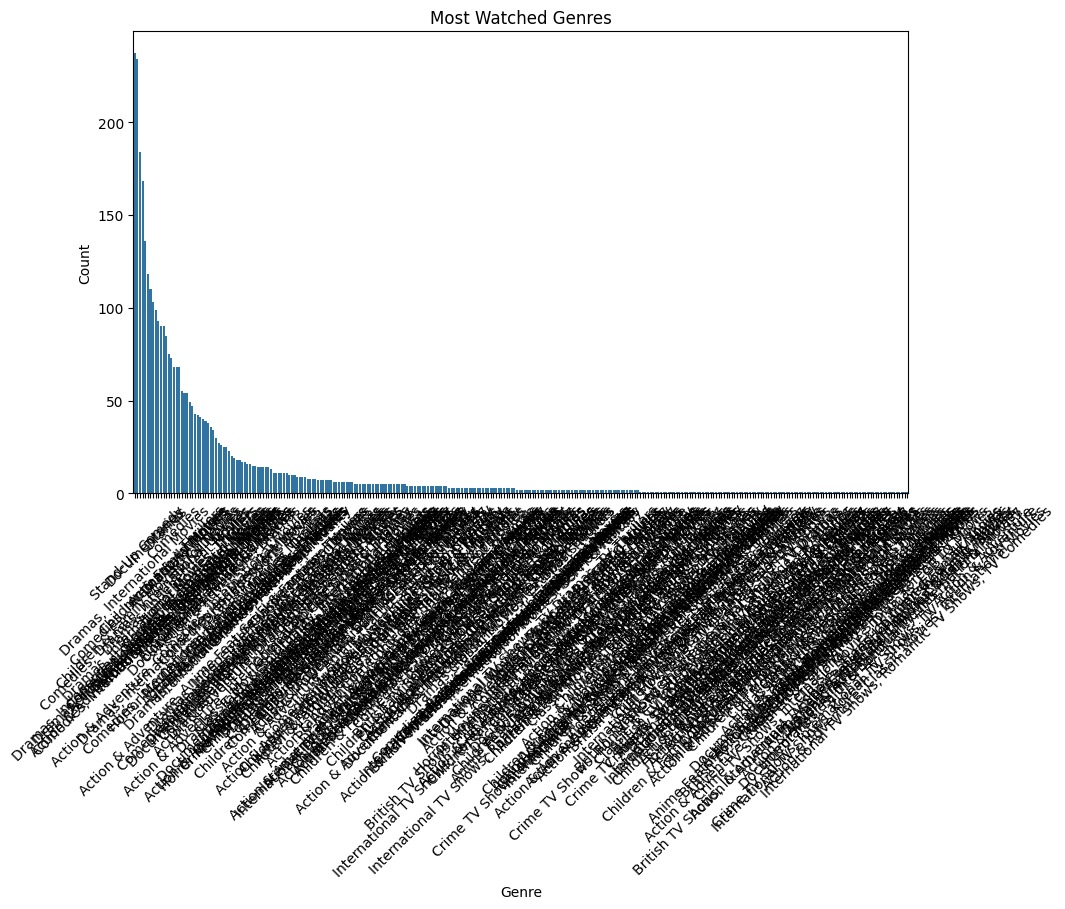

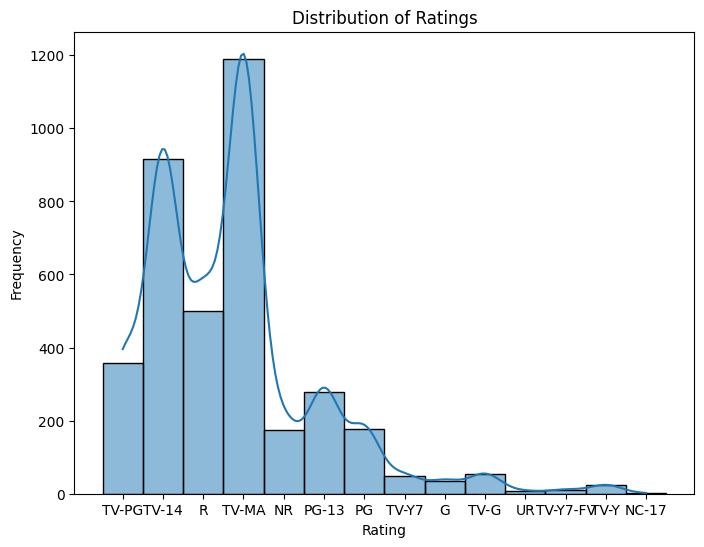

  cannot coerce class ‘"function"’ to a data.frame



RRuntimeError: Error in as.data.frame.default(df) : 
  cannot coerce class ‘"function"’ to a data.frame


In [30]:
# prompt: Perform data preparation by unzipping the dataset with name netflix_data.csv.zip and renaming it to "Netflix_shows_movies."
# Address missing values in the dataset through data cleaning.
# Conduct data exploration, including generating data descriptions and performing statistical analysis.
# Create visualizations to represent the most watched genres and the distribution of ratings using Python libraries (Seaborn, Pyplot, and Matplotlib).

import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import os
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

# Install necessary libraries if not already installed
!pip install pandas seaborn matplotlib rpy2

# Activate automatic conversion between pandas and R dataframes
pandas2ri.activate()

# Unzip the dataset
# Replace 'netflix_titles.zip' with your actual file name if different
try:
    with zipfile.ZipFile('/content/netflix_data.csv.zip', 'r') as zip_ref:
        zip_ref.extractall('/content/')
except FileNotFoundError:
    print("Error: File 'netflix_data.csv.zip' not found. Please ensure the file exists and is in the correct location.")
    exit()

# Rename the extracted file
os.rename('/content/netflix_data.csv', '/content/Netflix_shows_movies.csv')

# Load the dataset into a Pandas DataFrame
try:
    df = pd.read_csv("/content/Netflix_shows_movies.csv")
except FileNotFoundError:
    print("Error: File 'Netflix_shows_movies.csv' not found. Please ensure the file exists and is in the correct location.")
    exit()
print(df.head)

# Data Cleaning: Handling missing values
df.dropna(inplace=True)
print(df.head)

# Data Exploration
data_description = df.describe()
print(data_description)
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())


# Data Visualization
# most watched genre
genre_counts = df['listed_in'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Watched Genres')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


# Data Visualization in R
# Explicitly convert the pandas DataFrame to an R DataFrame
# and assign it to a variable with a different name

r_code = """
library(ggplot2)
library(dplyr)

# Convert Python dataframe to R dataframe
df_r <- as.data.frame(df)

ggplot(df_r, aes(x=rating)) +
  geom_histogram(binwidth=0.5, fill='blue', color='black', alpha=0.7) +
  ggtitle("Distribution of Ratings (R)") +
  xlab("Rating") +
  ylab("Frequency")
"""
# Execute R code
robjects.r(r_code)



